# Lab 3 Key: Data Visualization

Next we will will explore data visualization in more detail using the Pandas, Matplotlib, and Seaborn packages in python. After this lab you will be able to:
- Decide which chart type will most clearly communicate an insight from your data
- Create a variety of plot types including:
    - Scatter Plots
    - Regression Plots
    - Line Plots
    - Bar Plots
    - Box and Whisker Plots
    - Histograms
- Create a cleaned up and visually appealing plot that you could put into a report.

Let's start by importing the packages we will be using and loading the data we will be using

In [1]:
### Only run this code if using Jupyter Lite ###
#Installs plotting library
%pip install -q seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import our data analysis library
import pandas as pd
#Import a plotting library
import matplotlib.pyplot as plt
#Import a plotting library useful for styling a plot
import seaborn as sns

In [3]:
#Read the merged sections csv in the data folder
df = pd.read_csv('../data/sections_merged.csv')

<div class="alert alert-block alert-info"><b>Exercise:</b> Load another dataframe from the <code>'df_long_oci.csv'</code> in the data folder.</div>

In [4]:
df_oci_long = pd.read_csv('../data/df_long_oci.csv')### Your Code Here ###

You've seen a few examples of very simple plots created using pandas built in functions, but there is a wide variety of options when plotting in python. [Matplotlib](https://matplotlib.org/) is one of the most common and comprehensive plotting libraries used for static data visualizaiton, it allows for a great deal of fine control over the details of plotting, and it works well with other libraries such as Pandas and [Seaborn](https://seaborn.pydata.org/). Matplotlib is actually the base code used for the plotting operations of both Pandas and Seaborn. Pandas and Seaborn simplify certain elements of matplotlib, but matplotlib is useful when we seek fine tuned control. 

We will use each of these tools throughout this lab, but each is useful for different things:
|Package|Most Useful For|Complexity|
|----|----|----|
|Pandas Plots|Exploratory Analysis|Easy and Fast to Use with few built in choices|
|Matplotlib|Fine tuned control of individual plotting elements (labels, titles, and legends)|Complicated but highly customizable|
|Seaborn|Standard plots with quality styles available out of the box|Middle of the Road: some customization with high quality defaults|

Seaborn is a useful package to use when beginning plotting due to it's simplicity, and you may extend it's functionality with matplotlib customization as needed. That said, let's start with some basic scatter plots using seaborn, it will allow us to see the basics most clearly. You can look at the documentation for the scatterplot function [here](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

<Axes: xlabel='RUT_12', ylabel='RIDE_12'>

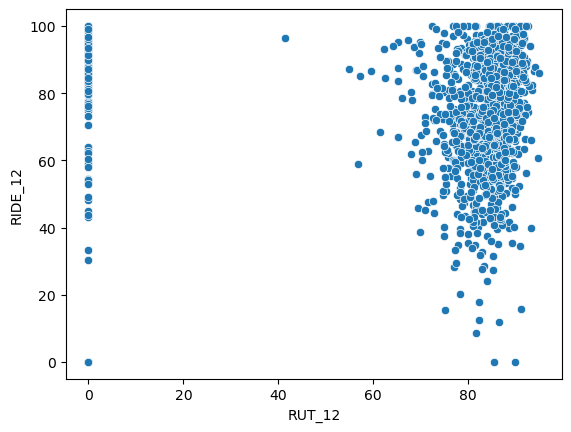

In [5]:
#Create a scatterplot using df with RUT_12 on the x axis and RIDE_12 on the y axis
sns.scatterplot(data=df, x='RUT_12', y='RIDE_12')

Seaborn plots typically work by calling the type of plot you seek to create with arguments accepted for the data frame you would like to use, the name of the columns you seek to use as x and y variables. Most functions can accept many additional arguments, however, to facilitate data grouping, such as the `hue` argument shown below. Take a look at the `sns.scatterplot()` [documentation](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) to see the additional arguments it accepts and examples.

<Axes: xlabel='RUT_12', ylabel='RIDE_12'>

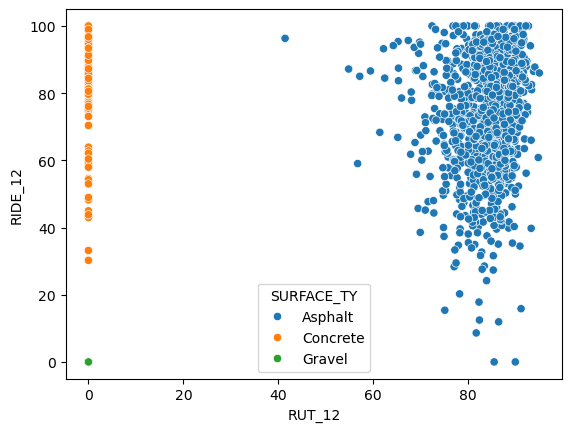

In [6]:
sns.scatterplot(data=df, x='RUT_12', y='RIDE_12', hue='SURFACE_TY')

We can also extend our seaborn plots by adding some individual elements using matplotlib. When creating visualizations with matplotlib and seaborn we create a canvas for our chart and relative elements to live on, we place the chart on the canvas, and we can modify or add specific elements. Here is an example:

(0.0, 100.0)

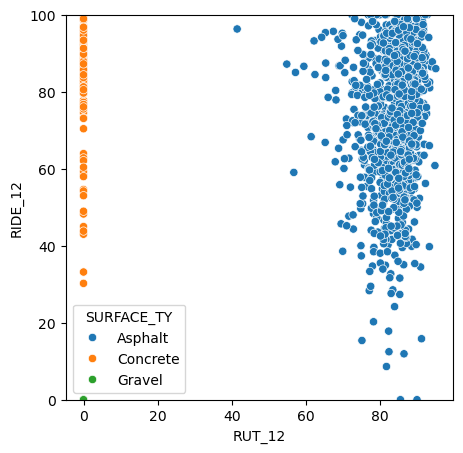

In [7]:
#Create the figure and axis canvas for plotting. Try changing the figsize to see what happens.
fig, ax = plt.subplots(figsize=(5, 5)) 

#Create the seaborn scatter plot and place it on 'ax' (ax=ax)
sns.scatterplot(data=df, x='RUT_12', y='RIDE_12', hue='SURFACE_TY', ax=ax)

#Set the scale limits of the ax object. What happens when you change these?

ax.set_ylim([0, 100])

To make the relationship between these variables even clearer, let us filter down to a subset of the data: only segments with Asphalt as the surface that are in an individual region (lets start with region 4). We can use the `sns.regplot()` function to see a quick and simple linear regression with error to visualize the relationship.

<Axes: xlabel='RUT_12', ylabel='RIDE_12'>

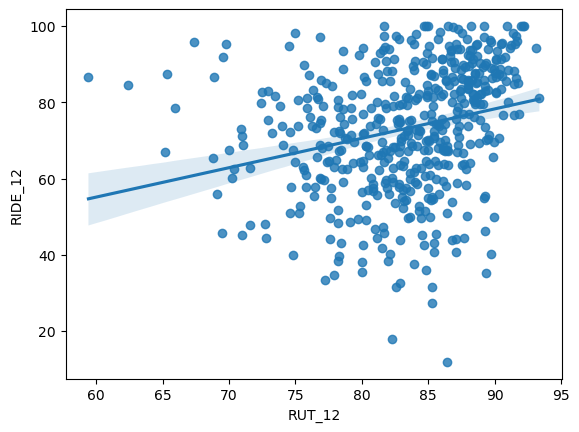

In [8]:
#Use a regression plot to visualize the linear correlation between variables. Change the region to see how the relationship changes!
sns.regplot(data=df[(df['SURFACE_TY']=='Asphalt') & (df['REGION']==4)], x='RUT_12', y ='RIDE_12')

Let's go even further to look at all of the region's side by side to examine them. The seaborn `.lmplot()` function was designed to do exactly this. You'll find seaborn has many plotting options out of the box to do simple visualizations.

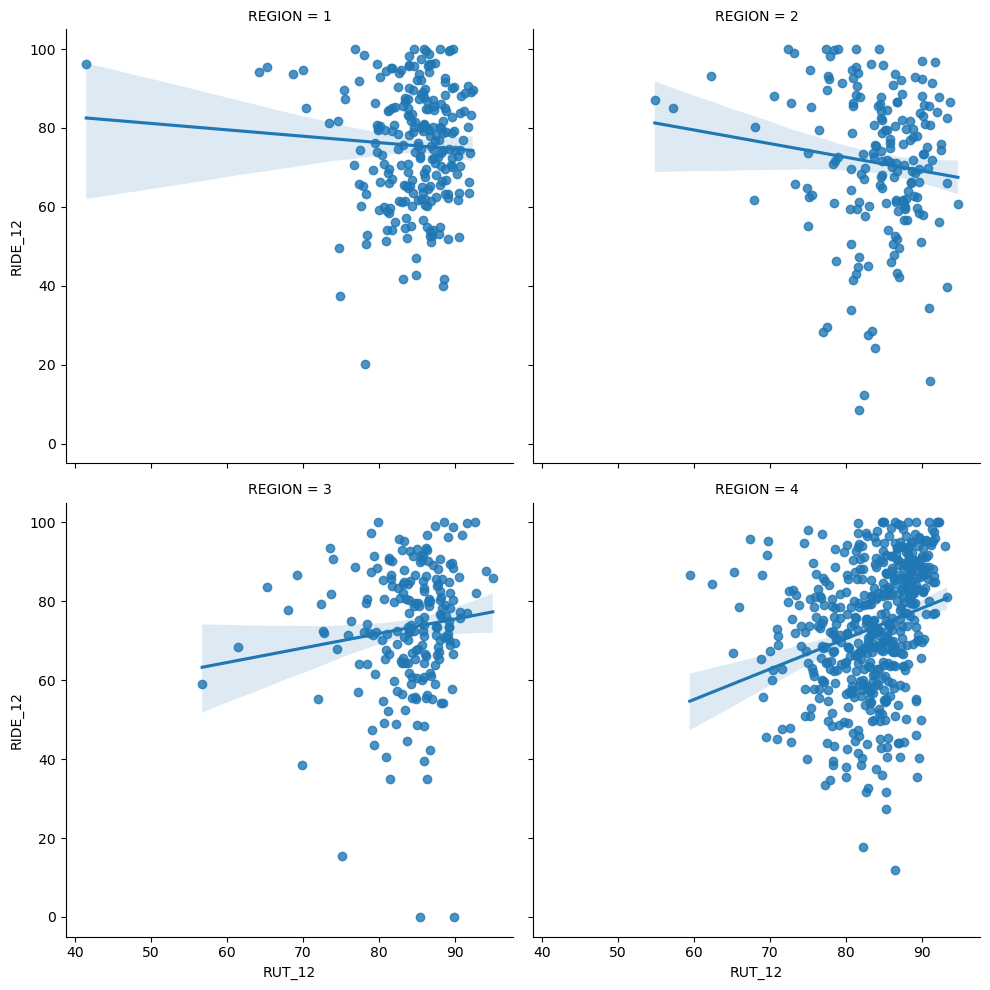

In [9]:
#Let's make it even a bit clearer! Seaborn offers powerful tools to examine data in as little as one line of code.
sns.lmplot(data=df[df['SURFACE_TY']=='Asphalt'],    #Define the data to plot
           x='RUT_12', y ='RIDE_12',                #Select the columns to use
           col='REGION', col_wrap=2                 #Subset the data by the region column to create multiple charts within one figure. Set it so there are only two columns
          )

Now let's make a more customized report ready plot by creatting some plotting settings to show how customizable things can be. We'll start by:
1. Set the seaborn Style
2. Create a figure and axis object to control figure elements
3. Define the data we want to plot with
4. Create the plot with a seaborn plotting function and setting `ax=ax` to place it on our figure
5. Adding other figure elements like titles and labels
6. Show the figure with `plt.show()`.

Try commenting out individual lines, changing settings, or modifying the plot type. What happens when you chang the color argument? When you remove the xlabel? What other elements might you want to add?

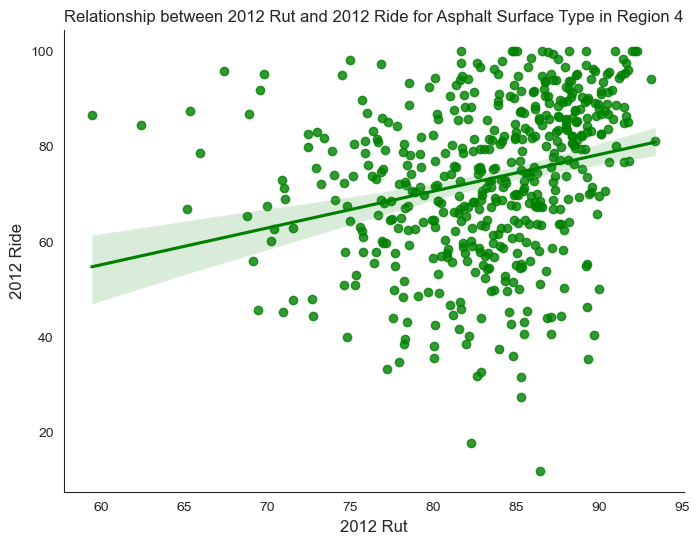

In [10]:
### Create a report ready plot with titles, and customized axis labels ###

#Set a seaborn style for plotting. Try out some other options: https://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles
sns.set_style("white")

#Set up our figure and ax objects
fig, ax = plt.subplots(figsize=(8, 6))

#Create a temporary filtered dataframe to plot with
plot_df = df[(df['SURFACE_TY']=='Asphalt') & (df['REGION']==4)]

#define the primary plot we will be using and place it on the ax object
sns.regplot(data=plot_df, x='RUT_12', y ='RIDE_12', color='green', ax=ax)

# Add title and labels using matplot lib elements
plt.title('Relationship between 2012 Rut and 2012 Ride for Asphalt Surface Type in Region 4')
plt.xlabel('2012 Rut', fontsize=12)
plt.ylabel('2012 Ride', fontsize=12)

#Remove top and right spines from the chart to leave just the x and y axis.
ax.spines[['right', 'top']].set_visible(False)

# Show plot
plt.show()

## Your Turn
### Beyond the Scatter Plot

Scatter plots and regression plots are useful when we want to look at the relationship between two continuous variables, but there are lots of different types of insights and relationships we can show through data visualization using the tools at our disposal.

<div class="alert alert-block alert-info"><b>Exercise:</b> In the markdown cell below, answer the following quetsions. What types of relationships or data insights are most suitable to each type of chart? Thinking about our pavement data specifically, which type of chart is most suitable to conveying the listed variable relationships or insights? Answer in the markdown cell below by double clicking the cell to edit and running it when you are finished.</div>

What type of insight is each chart best at communicating:
- Line Charts: Insights over time
- Scatter Plots: Correlation between variables
- Histograms: Distribution of a single variable
- Bar Plots: Time series (when limited measurements), share of values. Comparisons
- Box and Whisker Plots: Distribution of variables, especially when comparing between subsets of the data.

Using the pavement data we are working with, which type of chart will be best for each of the following variable relationships or insights:
- The distribution of of pavement ages: Histogram or boxplot
- A pavement segment's OCI score over time: line chart or vertical bar chart
- The total surface area of each surface type: horizontal bar char
- The number of miles in each region: Horizontal bar chart
- The distribution of OCI scores in each year: boxplots

<div class="alert alert-block alert-info"><p><b>Exercise:</b> Make some of the plots you described above using seaborn! 
    <ul> Make at least the following:
        <li>A plot of the distribution of pavement ages (<code>YR_SURF</code>)</li>
        <li>One segment's pavement OCI score over time (use a filtered version of <code>df_oci_long</code> for this)</li>
        <li>The total surface area of each surface type</li>
    </ul>
Feel free to use google and the seaborn documentation for assistance! Most of these plots can be craeted using just a few lines of code. Choose at least one of these plots to customize with matplotlib functions (add titles, labels, etc.) as though you were placing it in a report. </p>
</div>

**Hint:** Take a look at the plotting options in seabon that you can use: [https://seaborn.pydata.org/api.html#function-interface](https://seaborn.pydata.org/api.html#function-interface). You can call any of these plots in a similar way that we have above: `sns.plottype(arguments...)`. Seaborn will do most of the grouping and aggregating for you but you may find you want or need to perform a `.groupby()` or `.value_counts()` operation on your data as we saw in the previous labs.

<Axes: xlabel='YR_SURF', ylabel='Count'>

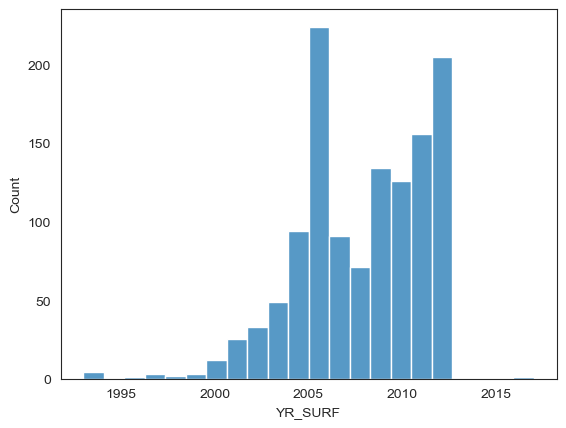

In [11]:
sns.histplot(df['YR_SURF'])### Your Code Here ###

<Axes: xlabel='year', ylabel='OCI'>

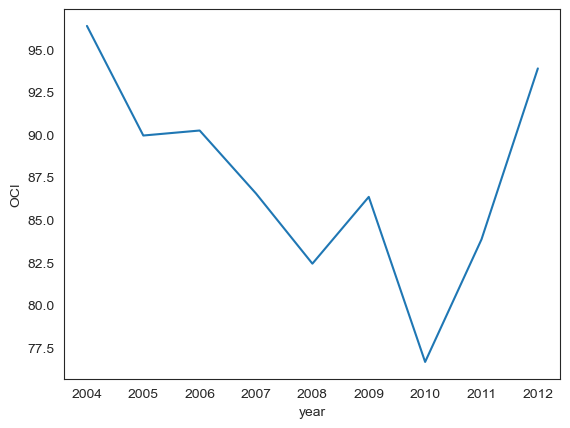

In [12]:
filtered = df_oci_long[df_oci_long['id']=='0006P-Both-1']
sns.lineplot(filtered, x='year', y='OCI')
### Your Code Here ###

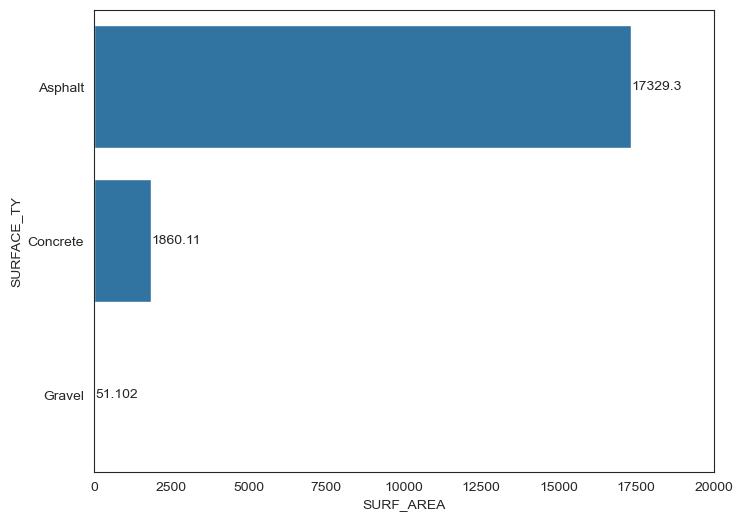

In [13]:
sum = df.groupby('SURFACE_TY').sum()['SURF_AREA']

fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(sum, orient='h', ax=ax)

ax.set_xlim([0, 20000])
ax.bar_label(ax.containers[0])

plt.show()

### Your Code Here ###

## Bonus Exercise
Try a more challenging visualization problem! Use of google, stack overflow, and tutorials are encoraged but try to avoid an ai unless you're really stuck.
- Option 1: Create a pie chart to show the proportion of miles by region. You'll need to use matplotlib and a `.groupby()` operation to do this.
- Option 2: Create a lollipop chart (also called a stem plot) of the OCI_12 scores for the 10 highest and the 10 lowest rated segments. Add figure annotations to make this an explanatory plot. You will need to reformat and sort the data to do this (**Hint:** the Pandas DataFrame `.head()` and `.tail()` methods can be very useful here.
- Option 3: How might you utilize loops or functions when plotting? Try to define a custom function for a type of plot, or incorporate a loop to generate multiple plots or plot elements.



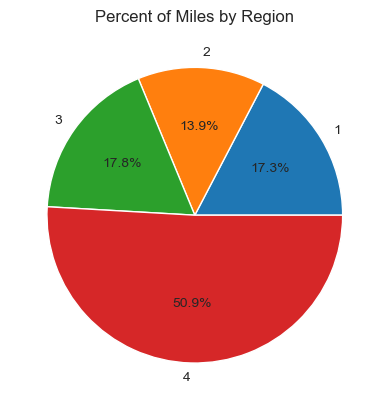

In [26]:
pie = df.groupby('REGION').sum()['MILES']
ax = pie.plot.pie(autopct='%1.1f%%',ylabel='', title='Percent of Miles by Region')
plt.show()
### Your Code Here ###

In [40]:
# Sort the dataframe by OCI_12 scores
df_sorted = df.sort_values(by='OCI_12')

# Get the 10 highest and 10 lowest rated segments
top_segments = df_sorted.tail(10)
bottom_segments = df_sorted.head(10)

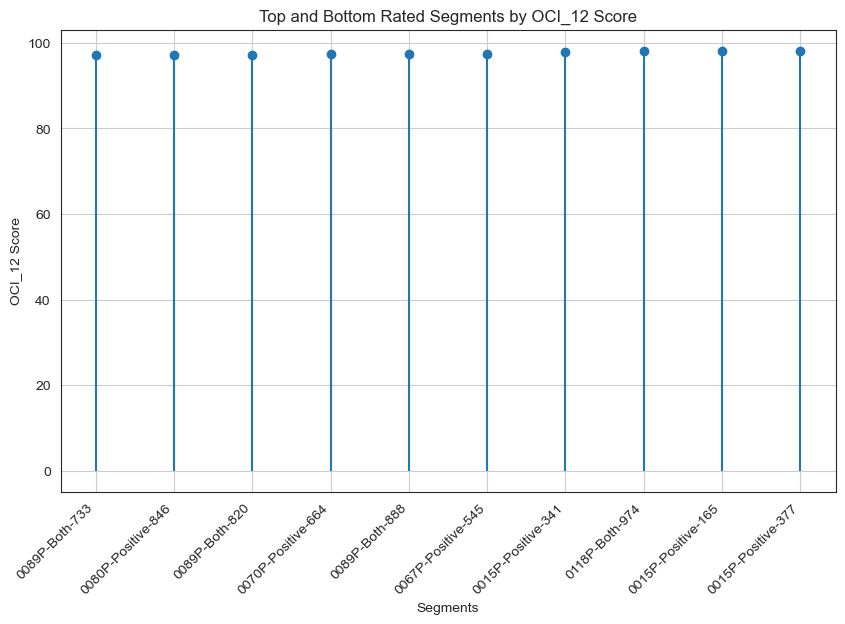

In [43]:
#Create Figure
fig, ax = plt.subplots(figsize=(10,6))
#Add stem plot to the axes)
ax.stem(top_segments['id'], top_segments['OCI_12'], markerfmt='o', linefmt='-', basefmt=' ')
#Modify x tick labels for clarity
plt.xticks(rotation=45, ha='right')

#Add labels and title
plt.xlabel('Segments')
plt.ylabel('OCI_12 Score')
plt.title('Top Rated Segments by OCI_12 Score')
#Add grid to figure
plt.grid(True)
#Show figure
plt.show()